# Ridge

Following [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), it performs a regression trying to minimize the sum of squared error (as the linear regression above does) with a penalty on the size of the coefficients. Therefore, it tries to minimize the following quantity
$$ ||y - Xw||^2_2 + \alpha  ||w||^2_2 , $$ 
where $w$ is the coefficient vector and the parameter $\alpha$ controls the amount of regularization (called $L_2$ as it uses the $L_2$ norm of the coefficient vector). The higher this parameter, the lower will be the variance of the model.

It is a very useful regularization in case of multicollinearity in the input data that tipically lead to very large coefficients. The regularization is putting a penalty on larger coefficients, thus reducing the effect of multicollinearity.

On the contrary of the simple linear regression, we have some hyperparameters to play with

In [1]:
import pandas as pd
import numpy as np

import random

import source.hyperplots as hyp
import source.explore as exp
from source.report import plot_predictions, make_results, store_results
from source.utility import cv_score, grid_search
import source.transf_univ as df_p
from source.experiments import make_exp, learning_curve

from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge, Perceptron

%matplotlib inline
pd.set_option('max_columns', 500)

lab_book = 'data/03_linear_models.csv'  # for storing results

In [2]:
Ridge()

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

* **alpha**: the regularization and most important hyperparameter to tune. It must be positive. When set to 0, we get the simple Linear regression.
* **copy_X**: that does not affect the results of the model but, if False, may lead to overwriting the input data
* **fit_intercept**: whether or not using an intercept term, not relevant for our cases as we, rightfully, always scale and center our data
* **max_iter**: a parameter that control the maximum number of iterations the solver can take to converge. Very rarely it needs to be increased and, if so, we might need to consider a different approach
* **normalize**: whether or not normalizing the data and it is ignored if set to False. If True, it uses the StandardScaler we already have in our pipeline
* **random_state**: relevant only for one of the solver since it is stochastic (the 'sag' solver)
* **solver**: the type of solver. Almost always leaving to `auto` is a good move as it will pick the best one for the data provided. The coiche will influence the speed and the behavior in particular situations.
* **tol**: the precision of the solution

## Noise and correlation

We can now repeat the previous experiments and observe how the algorithm is behaving differently even in the simplest case.

In [5]:
model = Pipeline([('imputer', df_p.df_imputer()), # everything assumes a 2 steps pipeline
                  ('ridge', Ridge())])
params = {'alpha': 1}

kfolds = KFold(10, shuffle=True, random_state=541)

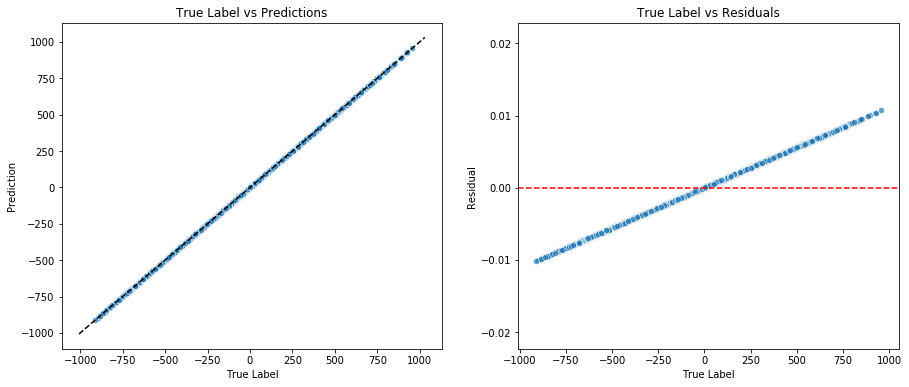

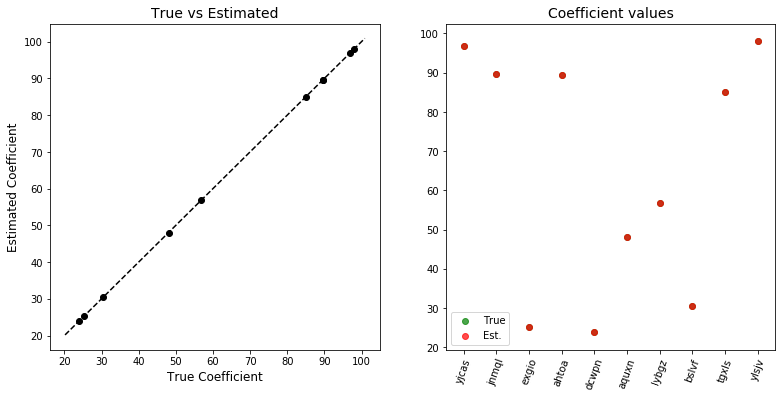

MAE: 		 0.00198
MSE: 		 1e-05
Max Error: 	 0.0107
Expl Variance: 	 1.0


In [6]:
make_exp(model=model, kfolds=kfolds, 
         data_name='data/simulated/10_feat_10_inf_nonoise.csv', 
         target_name=None, 
         features='all',
         sample=False, 
         store=True, coefs=True, store_name=lab_book, parameters=params, model_name='Ridge')

While the coefficients are again estimated perfectly, the residuals show a pattern that suggests that the model is having more and more troubles in predicting larger (in the absolute sense) values of the target variable.

On the other hand, the behavior in presence of noise and/or correlation is the nearly identical

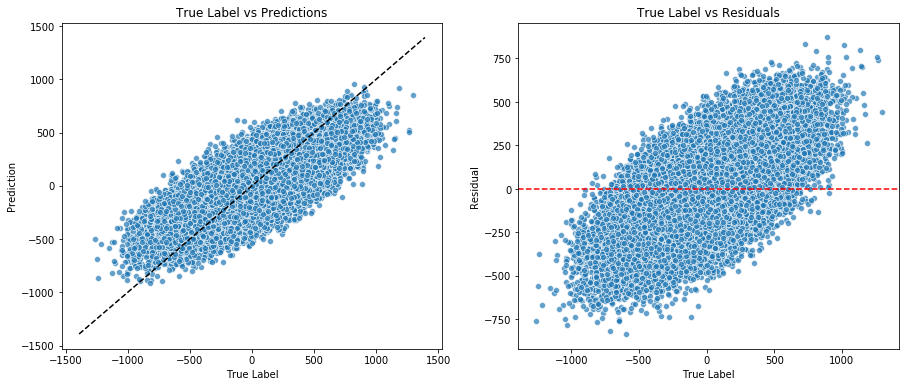

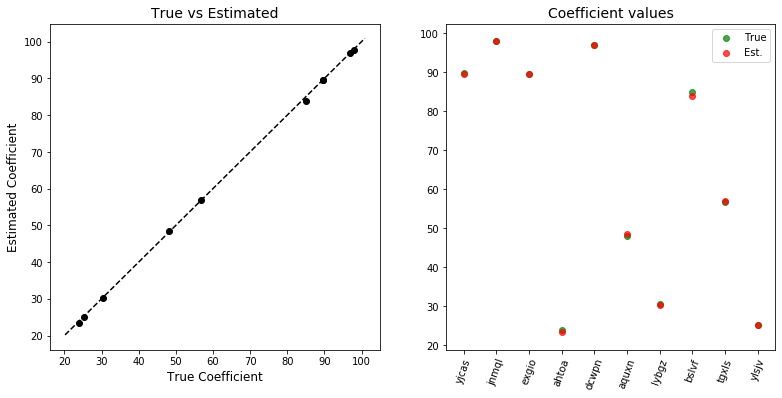

MAE: 		 159.15957
MSE: 		 39903.46366
Max Error: 	 870.78567
Expl Variance: 	 0.55337


In [7]:
make_exp(model=model, kfolds=kfolds, 
         data_name='data/simulated/10_feat_10_inf_noise.csv', 
         target_name=None, 
         features='all',
         sample=False, 
         store=True, coefs=True, store_name=lab_book, parameters=params, model_name='Ridge')

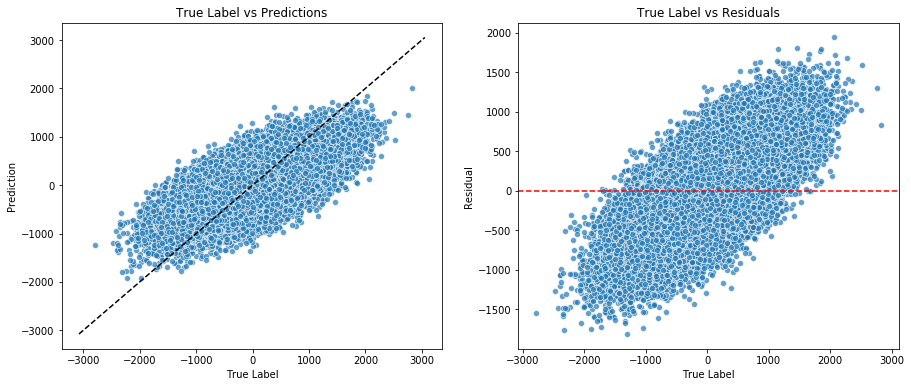

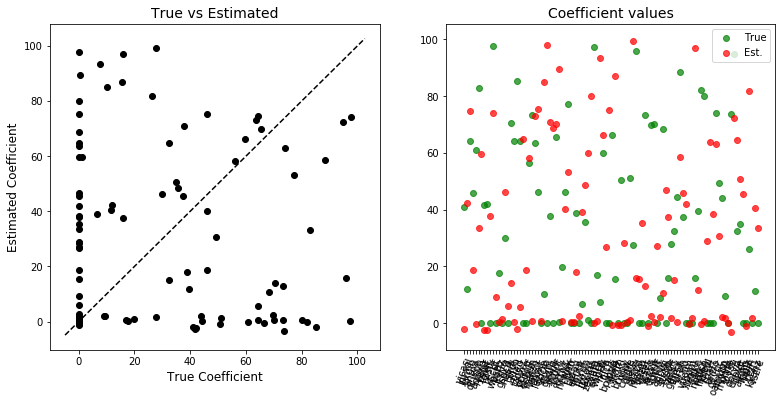

MAE: 		 359.51791
MSE: 		 202633.43736
Max Error: 	 1939.61387
Expl Variance: 	 0.48907


In [9]:
make_exp(model=model, kfolds=kfolds, 
         data_name='data/simulated/100_feat_65_inf_noise.csv', 
         target_name=None, 
         features='all',
         sample=False, 
         store=True, coefs=True, store_name=lab_book, parameters=params, model_name='Ridge')

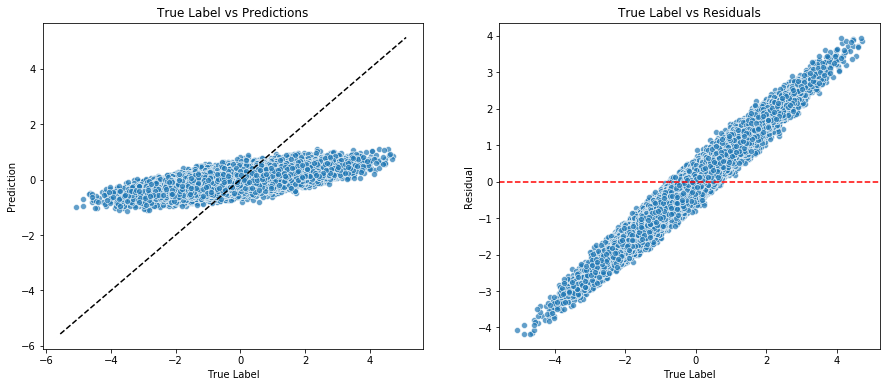

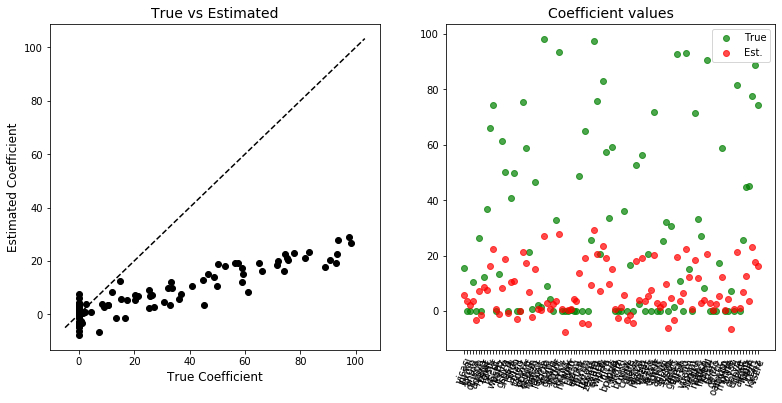

MAE: 		 0.79954
MSE: 		 1.00325
Max Error: 	 4.16769
Expl Variance: 	 0.26507


In [8]:
make_exp(model=model, kfolds=kfolds, 
         data_name='data/simulated/100_feat_65_inf_noise_rank.csv', 
         target_name=None, 
         features='all',
         sample=False, 
         store=True, coefs=True, store_name=lab_book, parameters=params, model_name='Ridge')

## Number of instances

Due to the fact that some of the solvers are faster, the only difference we observe is in the speed. The training time still grows linearly, but with a lower rate of increase.

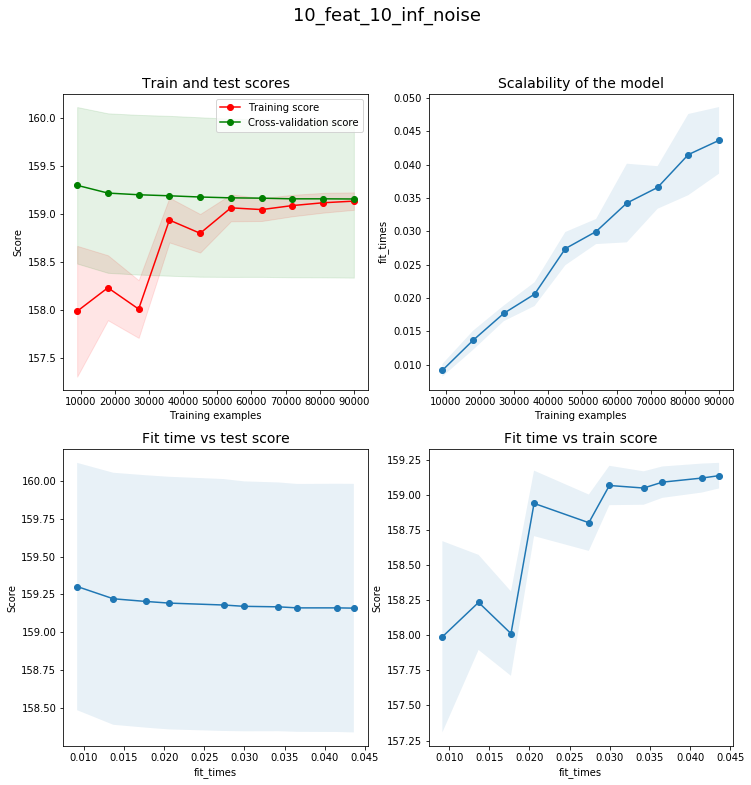

In [10]:
learning_curve(model=model, data_name='data/simulated/10_feat_10_inf_noise.csv', kfolds=kfolds)

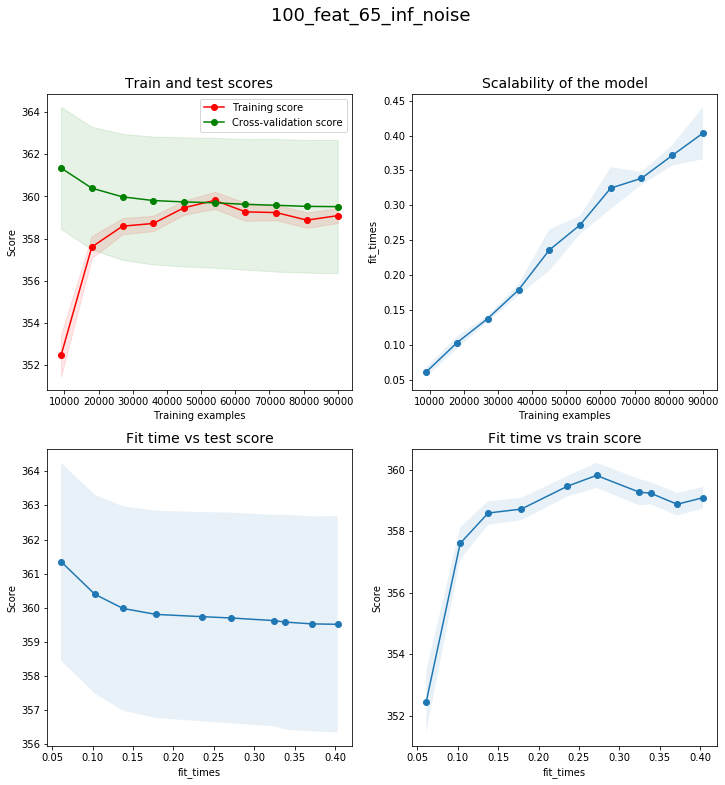

In [11]:
learning_curve(model=model, data_name='data/simulated/100_feat_65_inf_noise.csv', kfolds=kfolds)

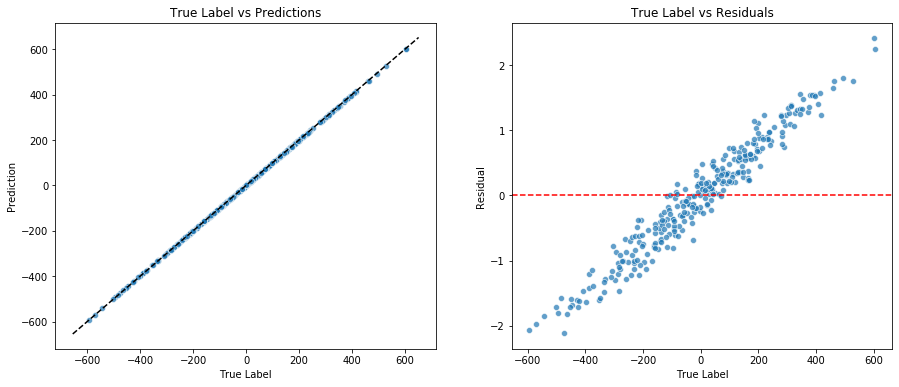

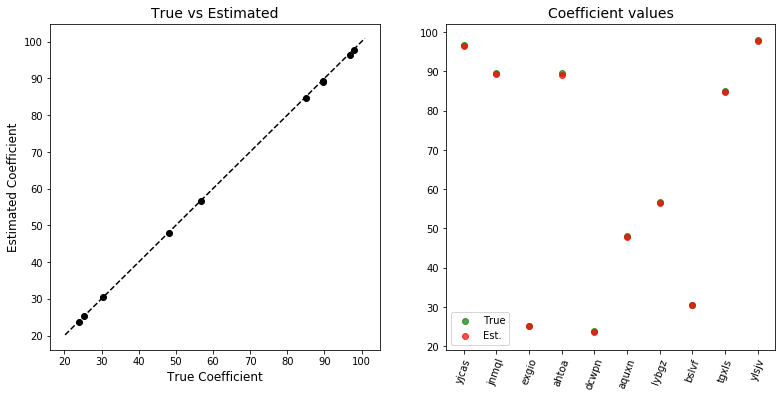

MAE: 		 0.70205
MSE: 		 0.76252
Max Error: 	 2.41225
Expl Variance: 	 0.99999


In [14]:
make_exp(model=model, kfolds=kfolds, 
         data_name='data/simulated/10_feat_10_inf_nonoise.csv', 
         target_name=None, 
         features='all',
         sample=300, 
         store=True, coefs=True, store_name=lab_book, parameters=params, model_name='Ridge')

For the first time we notice that the regularized model is performing better than the simple linear regression in presence of noise when the we have a limited number of instances. The better performance is visible in all the metrics and in the coefficients estimates

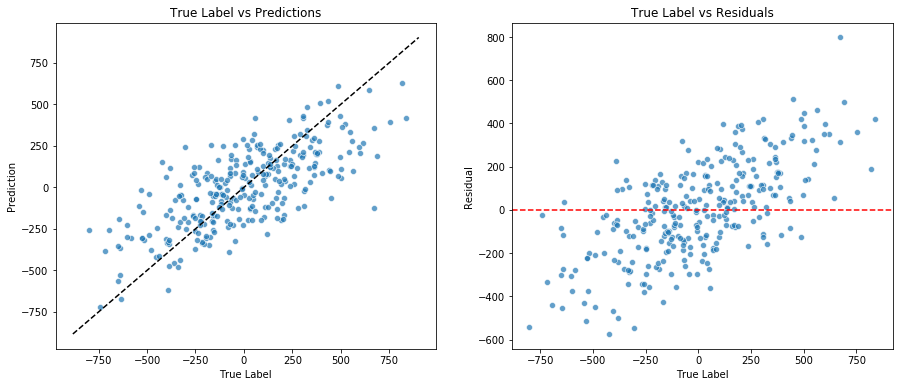

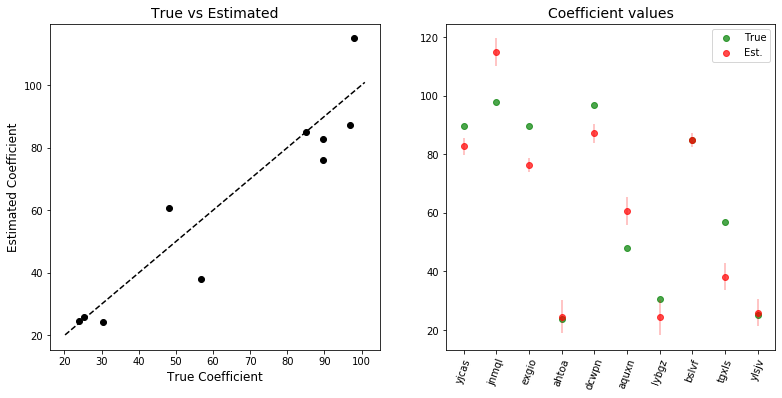

MAE: 		 173.7426
MSE: 		 48029.38596
Max Error: 	 797.57588
Expl Variance: 	 0.5137


In [15]:
make_exp(model=model, kfolds=kfolds, 
         data_name='data/simulated/10_feat_10_inf_noise.csv', 
         target_name=None, 
         features='all',
         sample=300, 
         store=True, coefs=True, store_name=lab_book, parameters=params, model_name='Ridge')

# More complex data

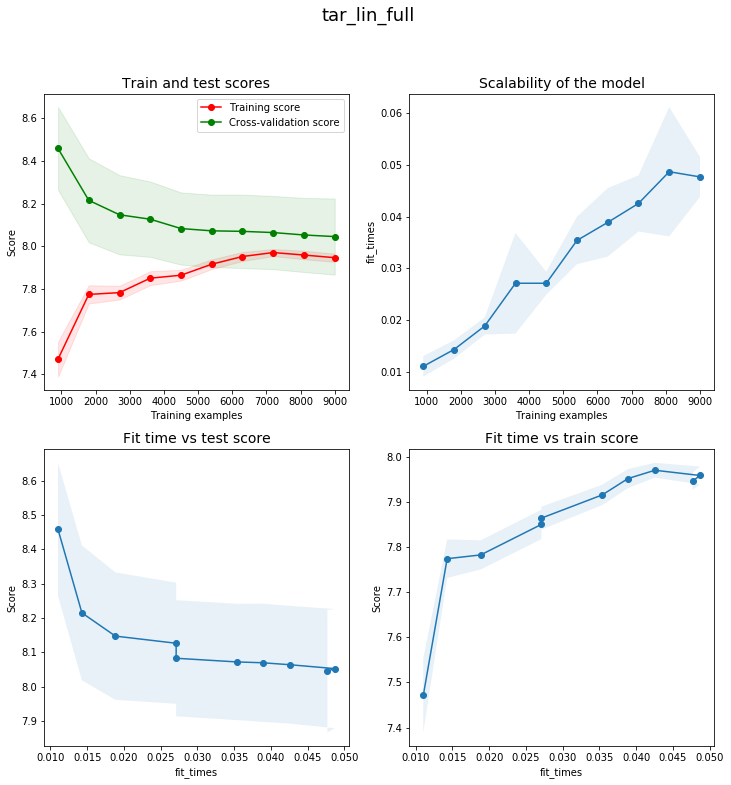

In [26]:
learning_curve(model, target_name='tar_lin_full', features='all', sample=10000, kfolds=kfolds)

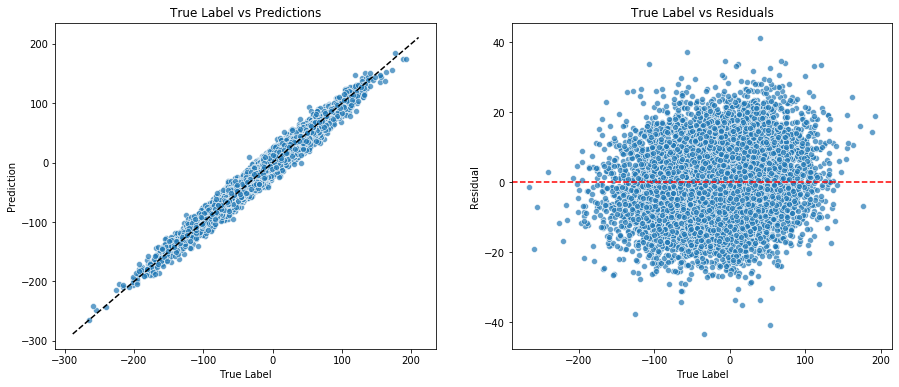

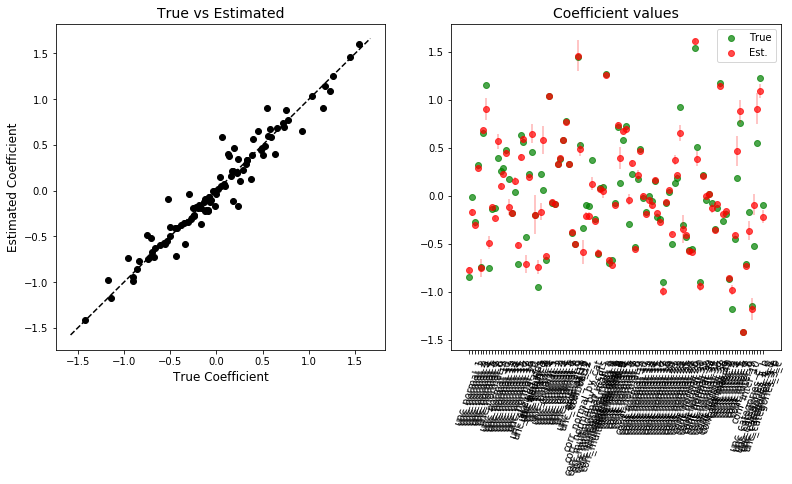

MAE: 		 7.93693
MSE: 		 99.30767
Max Error: 	 43.31005
Expl Variance: 	 0.96956


In [27]:
make_exp(model=model, kfolds=kfolds, 
         data_name=None, 
         target_name='tar_lin_full', 
         features='all',
         sample=10000, 
         store=True, coefs=True, store_name=lab_book, parameters=params, model_name='Ridge')

## Hyperparameters

All the above experiments were performed using the default hyperparameters, which generally gives a good indication of the model performance to compare results. However, this time we can control more the behavior of the model. This section will do just that.

First, we need to generate the results for different model configurations. We do so by using the custom grid search function imported from the utility module.

We will explore configurations that differ per regularization, precision, and solver type. Due to the need of seeing some pattern, we will use a dataset without noise in order to have errors at an order of magnitude that let us see the variation when the hyperparameter varies. Later, using more complex dataset, we will see more interesting patterns

In [21]:
model = Pipeline([('imputer', df_p.df_imputer()), 
                  ('ridge', Ridge(random_state=325))])

param_grid = {'ridge__alpha': list(np.arange(0.05, 10, 0.05)), 
              'ridge__tol': [0.00001, 0.001, 0.1, 1], 
              'ridge__solver': ['svd', 'sparse_cg', 'lsqr', 'saga']}

df = pd.read_csv('data/simulated/100_feat_65_inf_nonoise.csv').sample(300)

target = df['target']

df_train = df.drop('target', axis=1)

res, bp, _ = grid_search(df_train, target, model, param_grid, 'neg_mean_squared_error', kfolds)

print(bp)
res.head()

{'ridge__alpha': 0.05, 'ridge__solver': 'sparse_cg', 'ridge__tol': 1e-05}


,param_ridge__alpha,param_ridge__solver,param_ridge__tol,mean_train_score,std_train_score,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
0,0.05,sparse_cg,1e-05,-0.009801,0.000362,-0.025714,0.007460,0.004612,0.000115,0.001542,0.000029
1,0.05,lsqr,1e-05,-0.009768,0.000357,-0.025756,0.007618,0.005396,0.000377,0.001549,0.000048
2,0.05,svd,1e-05,-0.009768,0.000357,-0.025763,0.007630,0.006823,0.000416,0.001657,0.000132
3,0.05,svd,0.1,-0.009768,0.000357,-0.025763,0.007630,0.006462,0.000094,0.001565,0.000025
4,0.05,svd,1,-0.009768,0.000357,-0.025763,0.007630,0.006425,0.000152,0.001563,0.000037


First, we see how the choice of the solver is influencing the training time, with `lsqr` and `sparse_cg` being the fastest. On the other hand, different solvers seem to get different scores but it is worth noticing that, by increasing the regularization, this difference becomes less and less relevant.

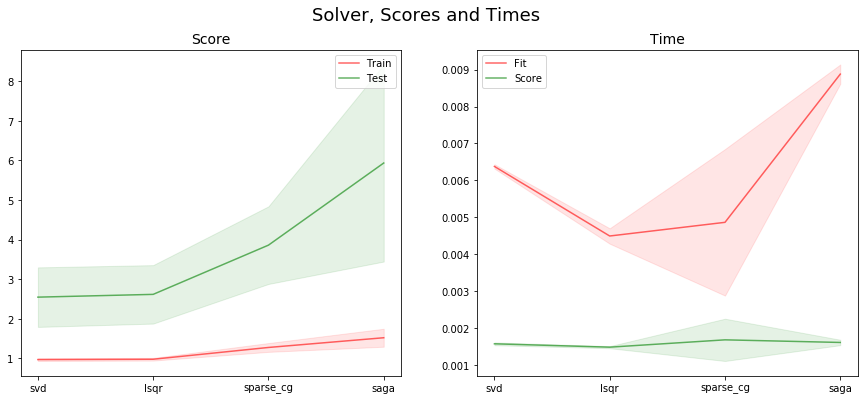

In [22]:
hyp.plot_hyperparameter(res[(res.param_ridge__alpha == 0.5) & (res.param_ridge__tol==0.001)], 'param_ridge__solver', 'Solver')

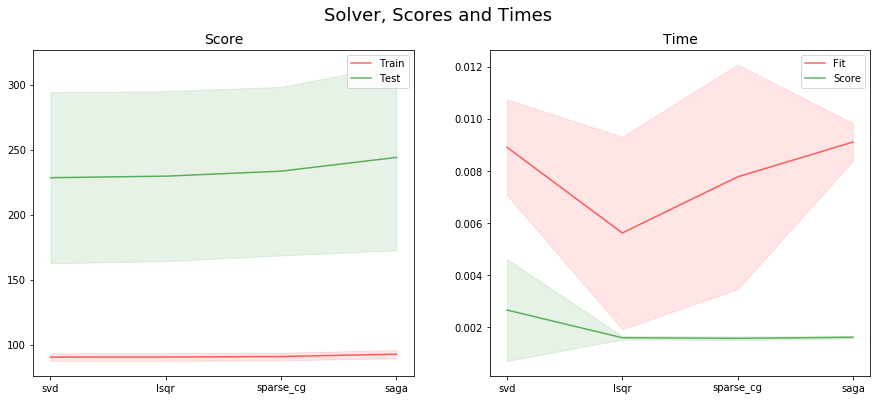

In [23]:
hyp.plot_hyperparameter(res[(res.param_ridge__alpha == 5) & (res.param_ridge__tol==0.001)], 'param_ridge__solver', 'Solver')

This is an artifact of the role of alpha in the model performance, which in this case (a purely linear regression) is getting worse and worse when alpha gets bigger. At the same time, we also notice that this choice does not influence the training time.

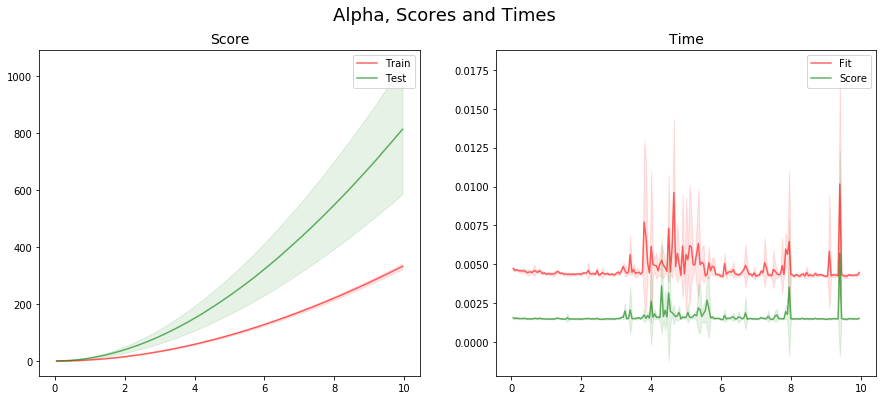

In [24]:
hyp.plot_hyperparameter(res[(res.param_ridge__solver=='lsqr') & (res.param_ridge__tol==0.001)], 'param_ridge__alpha', 'Alpha')

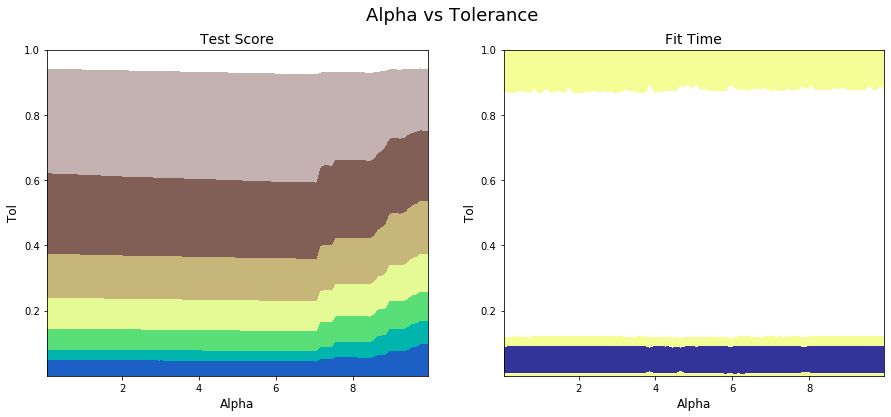

In [25]:
hyp.plot_two_hyperparms(res[(res.param_ridge__solver=='lsqr')], 'param_ridge__alpha', 'param_ridge__tol', 'Alpha vs Tolerance')

In [46]:
df = pd.read_csv('data/simulated/clean.csv').sample(1000)

target = df['tar_lin_half']

df_train = df.drop('tar_lin_full', axis=1)

df_train = pd.get_dummies(df_train, drop_first=True)

param_grid = {'ridge__alpha': list(np.arange(1, 10, 1)), 
              'ridge__tol': [0.00001, 0.001, 0.1, 1], 
              'ridge__solver': ['svd', 'sparse_cg', 'lsqr', 'saga']}

res, bp, _ = grid_search(df_train, target, model, param_grid, 'neg_mean_squared_error', kfolds)

print(bp)
res.head()

{'ridge__alpha': 1, 'ridge__solver': 'svd', 'ridge__tol': 1e-05}


,param_ridge__alpha,param_ridge__solver,param_ridge__tol,mean_train_score,std_train_score,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
0,1,svd,1e-05,-1.302518e-08,2.641702e-10,-1.688471e-08,3.362804e-09,0.013106,0.000773,0.001994,0.000150
1,1,svd,0.1,-1.302518e-08,2.641702e-10,-1.688471e-08,3.362804e-09,0.013187,0.000805,0.001957,0.000091
2,1,svd,1,-1.302518e-08,2.641702e-10,-1.688471e-08,3.362804e-09,0.013136,0.001026,0.002116,0.000396
3,1,svd,0.001,-1.302518e-08,2.641702e-10,-1.688471e-08,3.362804e-09,0.012843,0.000410,0.002088,0.000334
4,2,svd,1,-5.189715e-08,1.038235e-09,-6.721111e-08,1.331433e-08,0.014100,0.004221,0.001920,0.000148


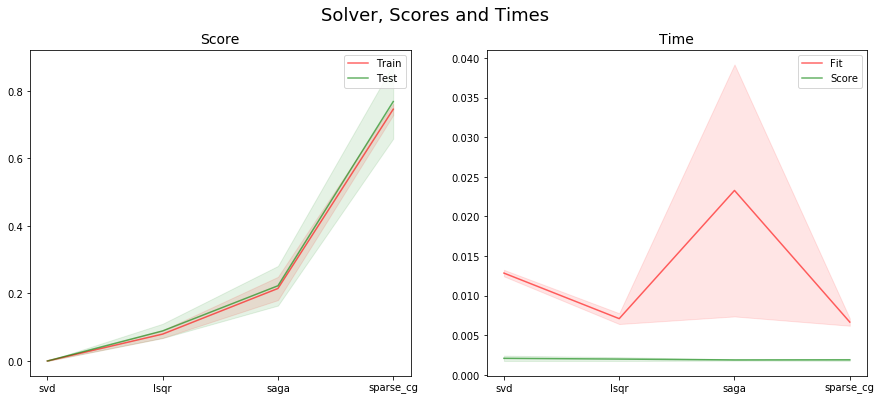

In [47]:
hyp.plot_hyperparameter(res[(res.param_ridge__alpha == 1) & (res.param_ridge__tol==0.001)], 'param_ridge__solver', 'Solver')

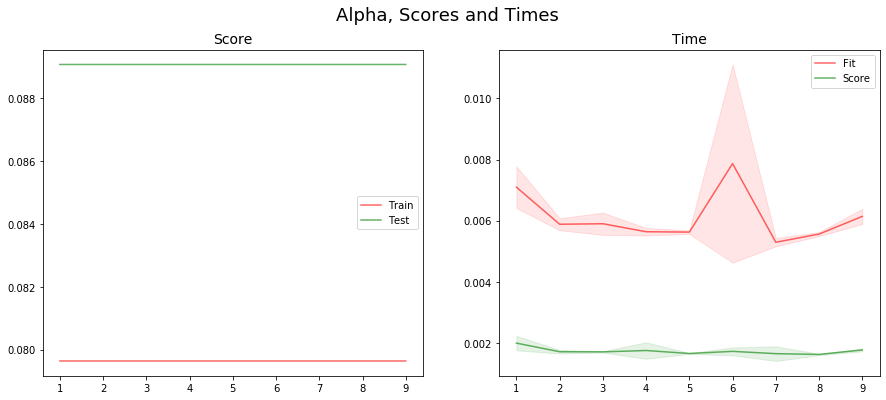

In [50]:
hyp.plot_hyperparameter(res[(res.param_ridge__solver=='lsqr') & (res.param_ridge__tol==0.001)], 'param_ridge__alpha', 'Alpha')

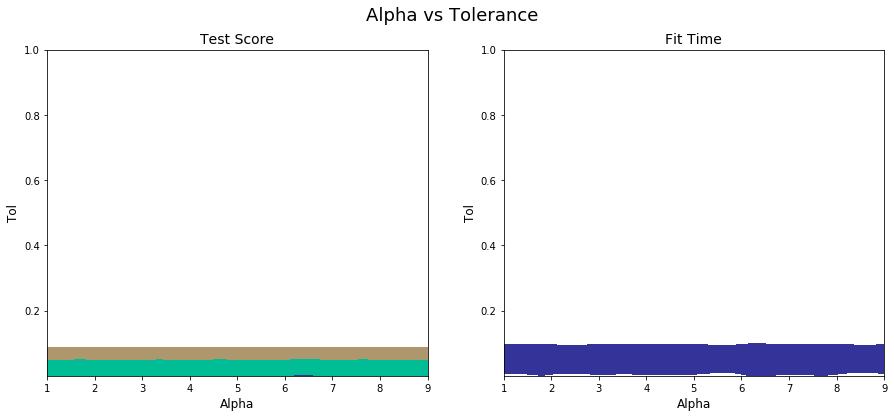

In [49]:
hyp.plot_two_hyperparms(res[(res.param_ridge__solver=='lsqr')], 'param_ridge__alpha', 'param_ridge__tol', 'Alpha vs Tolerance')